<a href="https://colab.research.google.com/github/jblcky/retail-pharmacy-inventory-optimization/blob/main/notebooks/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

exploratory data analysis based on synthetic sale data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive if in Colab
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file
file_path = '/content/drive/My Drive/pharmacy_sales_data.csv'
df = pd.read_csv(file_path, parse_dates=['date'])

df.head()

Mounted at /content/drive


,date,sku_id,category,units_sold,unit_cost,unit_price,lead_time_days,shelf_life_days,promotion_flag,holiday_flag
0,2023-01-02,SKU_1,OTC,192,25.940189,54.885552,7,90,0,0
1,2023-01-09,SKU_1,OTC,222,25.940189,54.885552,14,30,1,0
2,2023-01-16,SKU_1,OTC,196,25.940189,54.885552,21,90,0,0
3,2023-01-23,SKU_1,OTC,188,25.940189,54.885552,14,30,0,0
4,2023-01-30,SKU_1,OTC,191,25.940189,54.885552,14,30,1,0


In [ ]:
df.info()
df.describe()
df['category'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10400 entries, 0 to 10399
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             10400 non-null  datetime64[ns]
 1   sku_id           10400 non-null  object        
 2   category         10400 non-null  object        
 3   units_sold       10400 non-null  int64         
 4   unit_cost        10400 non-null  float64       
 5   unit_price       10400 non-null  float64       
 6   lead_time_days   10400 non-null  int64         
 7   shelf_life_days  10400 non-null  int64         
 8   promotion_flag   10400 non-null  int64         
 9   holiday_flag     10400 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 812.6+ KB


,count
category,
OTC,5512
Prescription,3952
Cold-chain,936


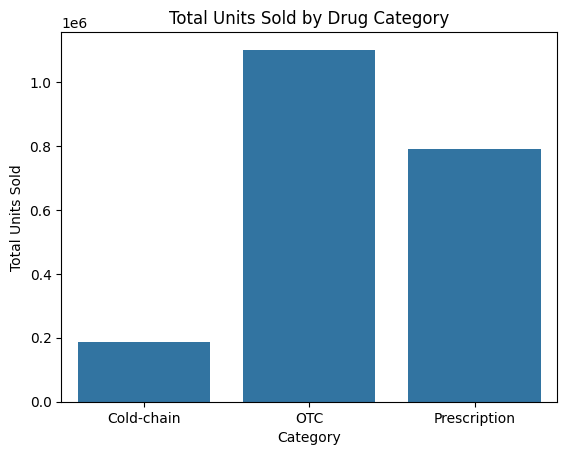

In [ ]:
category_sales = df.groupby('category')['units_sold'].sum().reset_index()

sns.barplot(data=category_sales, x='category', y='units_sold')
plt.title('Total Units Sold by Drug Category')
plt.ylabel('Total Units Sold')
plt.xlabel('Category')
plt.show()


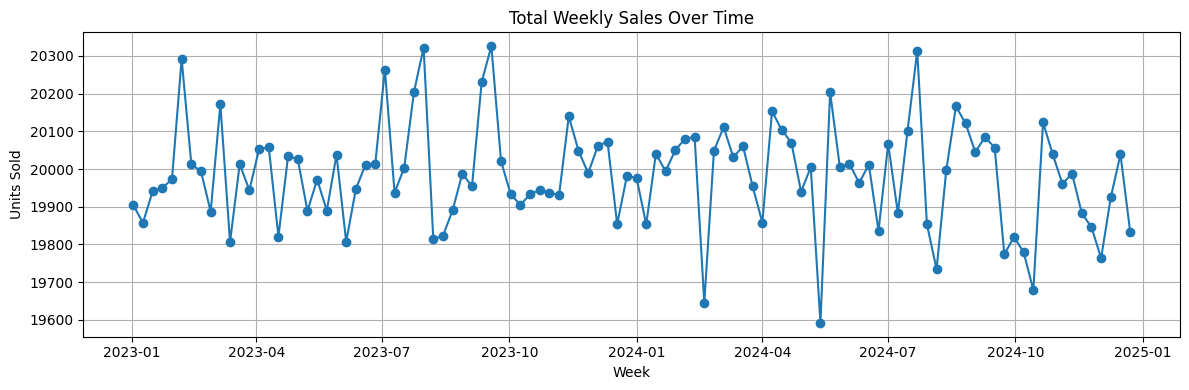

In [ ]:
weekly_sales = df.groupby('date')['units_sold'].sum().reset_index()

plt.figure(figsize=(12, 4))
plt.plot(weekly_sales['date'], weekly_sales['units_sold'], marker='o', linestyle='-')
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Units Sold')
plt.xlabel('Week')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Sales during promotion weeks
promo_sales = df[df['promotion_flag'] == 1]['units_sold'].mean()
non_promo_sales = df[df['promotion_flag'] == 0]['units_sold'].mean()

# Sales during holidays
holiday_sales = df[df['holiday_flag'] == 1]['units_sold'].mean()
non_holiday_sales = df[df['holiday_flag'] == 0]['units_sold'].mean()

print(f"Promo weeks avg sales: {promo_sales:.1f}")
print(f"Non-promo weeks avg sales: {non_promo_sales:.1f}")
print(f"Holiday weeks avg sales: {holiday_sales:.1f}")
print(f"Non-holiday weeks avg sales: {non_holiday_sales:.1f}")


Promo weeks avg sales: 200.0
Non-promo weeks avg sales: 199.8
Holiday weeks avg sales: 199.5
Non-holiday weeks avg sales: 199.9


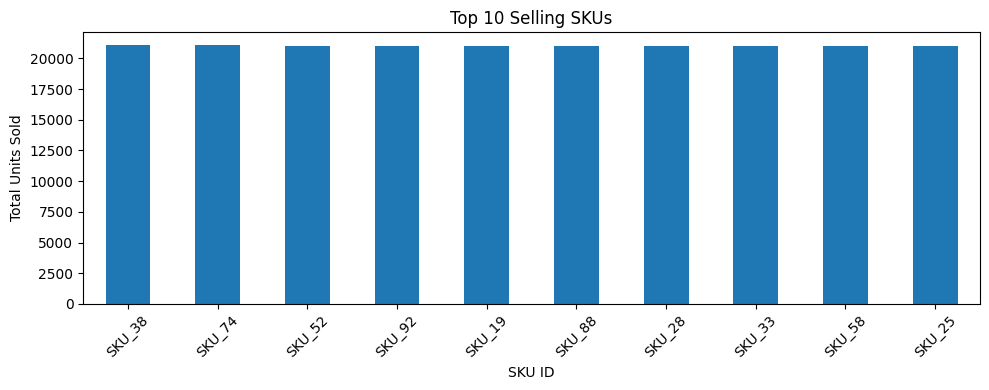

In [ ]:
top_skus = df.groupby('sku_id')['units_sold'].sum().nlargest(10)

plt.figure(figsize=(10, 4))
top_skus.plot(kind='bar')
plt.title('Top 10 Selling SKUs')
plt.ylabel('Total Units Sold')
plt.xlabel('SKU ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
